In [27]:
import pandas as pd
from collections import Counter
import itertools

In [28]:
dataframe = pd.read_csv("creditcard.csv")
dataframe.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
dataframe.isnull().values.any()

False

In [30]:
# The feature we are most interested in is the "Amount". Here is the summary of the feature.

dataframe["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [31]:
# Now lets check number of occurrences of each class label and plot the information using matplotlib

non_fraud = len(dataframe[dataframe.Class == 0])
fraud = len(dataframe[dataframe.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


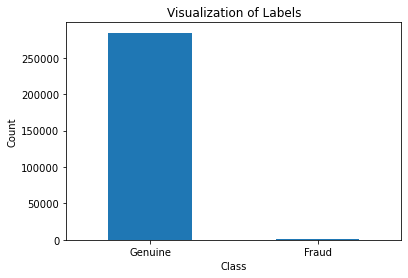

In [32]:
# Let’s plot the above information using matplotlib.

import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [33]:
# We can observe that the genuine transactions are over 99%. This is not good.
# Let’s apply scaling techniques on the “Amount” feature to transform the range of values. 
# We drop the original “Amount” column and add a new column with the scaled values. 
# We also drop the “Time” column as it is irrelevant.

import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount", "Time"], inplace= True, axis= 1)
Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis= 1)

In [34]:
# Now, split credit card data with a split of 70-30 using train_test_split().

from sklearn.model_selection import train_test_split
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


In [35]:
# Apply Machine Learning Algorithms to Credit Card Dataset

In [36]:
# Let’s build the Random Forest and Decision Tree Classifiers. 
# They are present in the sklearn package in the form of RandomForestClassifier() and DecisionTreeClassifier() respectively.

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Decision Tree

decision_tree = DecisionTreeClassifier()

# Random Forest

random_forest = RandomForestClassifier(n_estimators= 100)

In [37]:
# Train and Evaluate our Models on the Dataset
# Train the decision tree and random forest models on the dataset using the fit() function. 
# Record the predictions made by the models using the predict() function and evaluate.
# Lets visualize the scores of each of our credit card fraud classifiers.

decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)

decision_tree_score = decision_tree.score(test_X, test_Y) * 100

random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)

random_forest_score = random_forest.score(test_X, test_Y) * 100

print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  99.9602073897218
Decision Tree Score:  99.91105181231933


In [38]:
# The Random Forest classifier has slightly an edge over the Decision Tree classifier.

# Let’s create a function to print the metrics: accuracy, precision, recall, and f1-score.

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [42]:
# Let’s visualize the confusion matrix and the evaluation metrics of our Decision Tree model.

confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[85261    46]
 [   30   106]]


In [45]:
# plot_confusion_matrix(confusion_matrix_dt, classes=[0, 1], title= "Confusion Matrix - Decision Tree")